# Visualizing embeddings with tSNE

Doign the same as UMAP but nowwith tSNE.

In [1]:
import numpy as np
import torch as t
from transformers import AutoModel, AutoTokenizer, pipeline
from datasets import load_dataset
from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

import requests
import os

device = "mps" if t.backends.mps.is_available() else "cpu"

/Users/kj3moraes/Library/Caches/pypoetry/virtualenvs/reader-qnfOF5hD-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data


In [2]:
dataset = load_dataset("okite97/news-data", split="train")
news_df = dataset.to_pandas()
news_df.head()

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics


## Models 

In [3]:
minilm = SentenceTransformer("all-MiniLM-L6-v2").to(device)
mpnet = SentenceTransformer("all-mpnet-base-v2").to(device)

In [6]:
%%time 
news_df["Embeddings"] = minilm.encode(news_df["Title"]).tolist()
minilm_mapper = TSNE(
    metric='cosine',
    n_iter=1000,
    random_state=42
).fit_transform(np.array(news_df["Embeddings"].tolist()))
news_df.head()

CPU times: user 1min 16s, sys: 37.7 s, total: 1min 54s
Wall time: 14.9 s


,Title,Excerpt,Category,Embeddings
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,"[0.008831699378788471, 0.027855515480041504, -..."
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,"[0.04865872114896774, -0.038663506507873535, -..."
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,"[0.023812351748347282, 0.034734081476926804, 0..."
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,"[-0.07137732207775116, -0.007895383052527905, ..."
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,"[0.001584396930411458, -0.003182878252118826, ..."


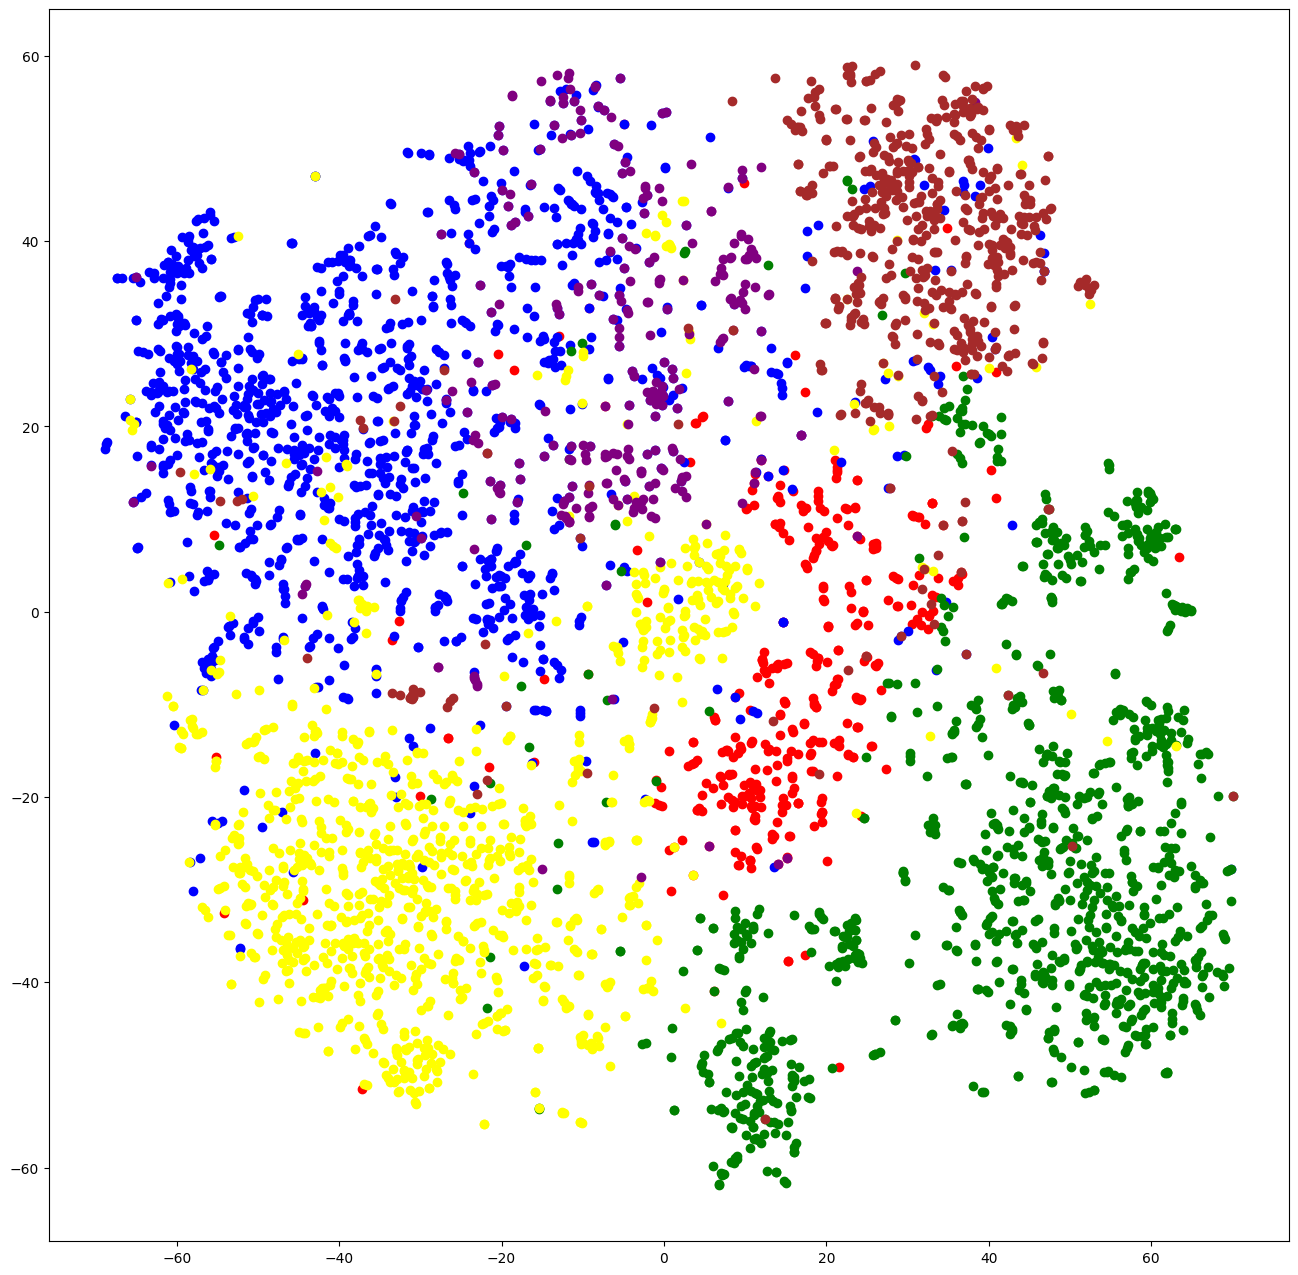

In [7]:
# plt.scatter(minilm_mapper[:, 0], minilm_mapper[:, 1])
categories = ['entertainment', 'business', 'sports', 'politics', 'tech', 'health']
colours = ['red', 'blue', 'green', 'yellow', 'purple', 'brown']
plt.figure(figsize=(16, 16))
for col, cat in zip(colours, categories):
    indices = news_df[news_df['Category'] == cat].index
    plt.scatter(minilm_mapper[indices, 0], minilm_mapper[indices, 1], c=col)


In [4]:
%%time 
news_df["Embeddings"] = mpnet.encode(news_df["Title"]).tolist()
mpnet_mapper = TSNE(
    metric='cosine',
    n_iter=1000,
    random_state=42
).fit_transform(np.array(news_df["Embeddings"].tolist()))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


CPU times: user 1min 19s, sys: 38.1 s, total: 1min 57s
Wall time: 19.3 s


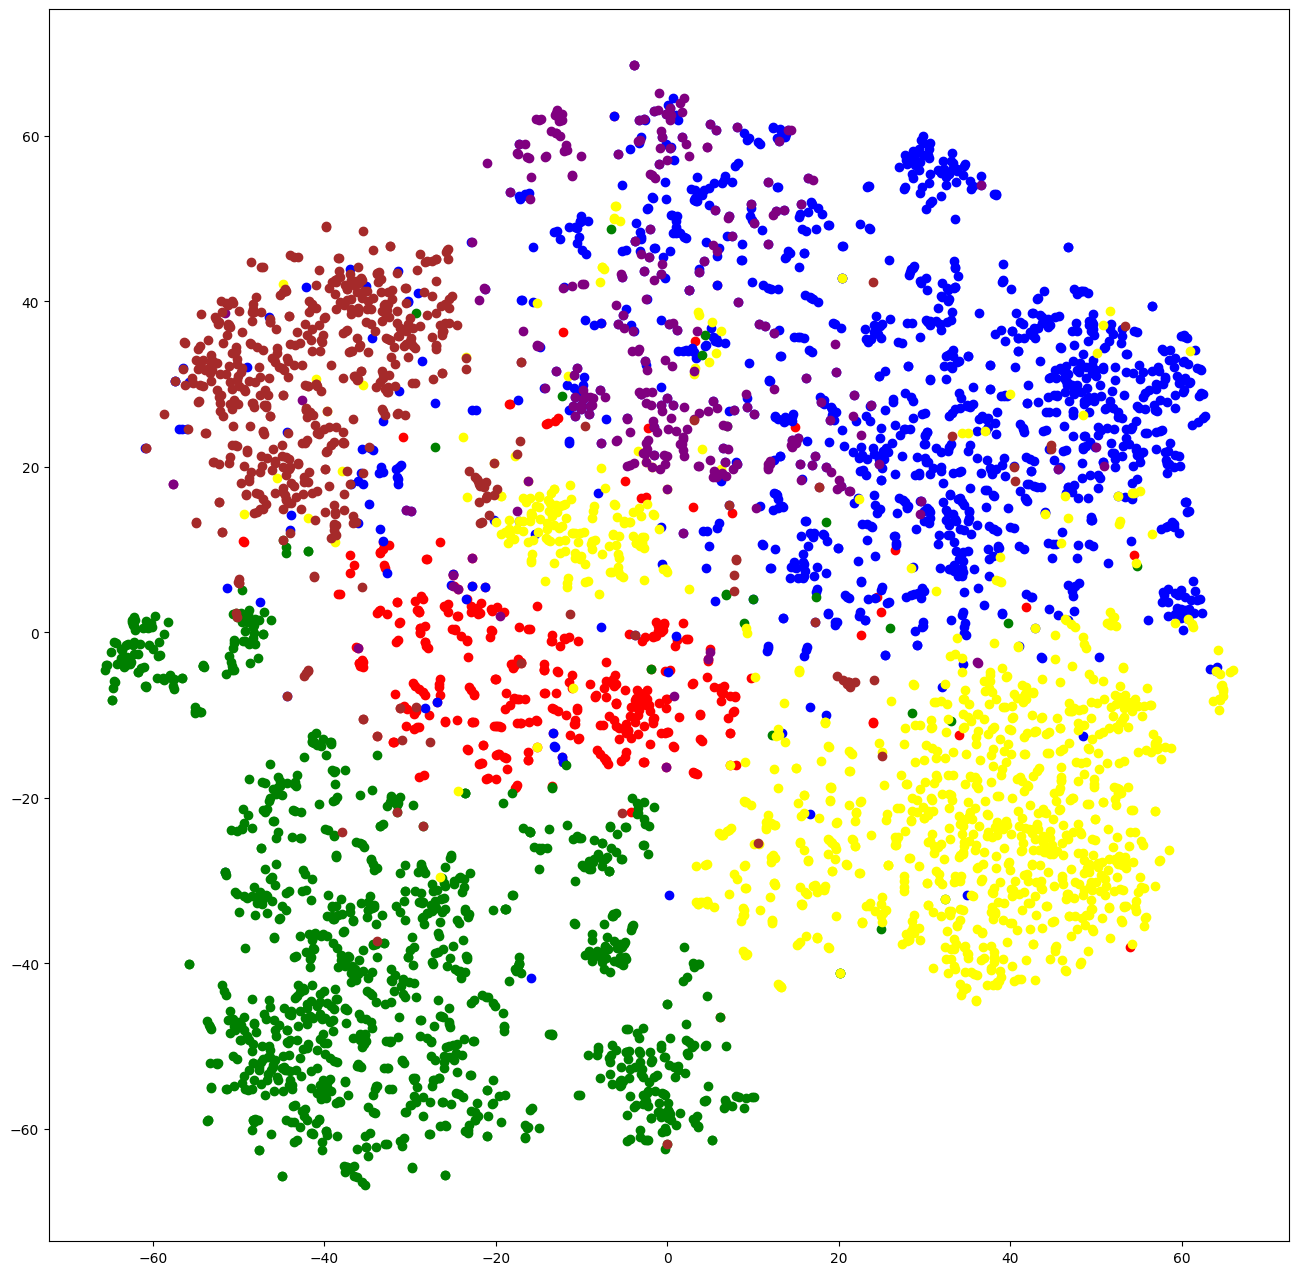

In [5]:
# plt.scatter(minilm_mapper[:, 0], minilm_mapper[:, 1])
categories = ['entertainment', 'business', 'sports', 'politics', 'tech', 'health']
colours = ['red', 'blue', 'green', 'yellow', 'purple', 'brown']
plt.figure(figsize=(16, 16))
for col, cat in zip(colours, categories):
    indices = news_df[news_df['Category'] == cat].index
    plt.scatter(mpnet_mapper[indices, 0], mpnet_mapper[indices, 1], c=col)

In [ ]:
perplexity = [2, 5, 30, 50, 100]